In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

In [3]:
benign_df = pd.read_csv('C:/Users/kruti/Desktop/proxy_analysis/data/cleaned_begnin/log_data.csv', low_memory=False)
exploit_df = pd.read_csv('C:/Users/kruti/Desktop/proxy_analysis/data/cleaned_exploit/combined_log_data.csv', low_memory=False)

In [5]:
def load_exploit_data(folder_path):
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".csv")]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

In [7]:
benign_agents = benign_df['userAgentString'].dropna().tolist()
exploit_agents = exploit_df['userAgentString'].dropna().tolist()

In [9]:
data = pd.DataFrame({
    "user_agent": benign_agents + exploit_agents,
    "label": [0] * len(benign_agents) + [1] * len(exploit_agents)
})

In [11]:
# Display basic info
print("Dataset Info:\n", data.info())
print("\nSample Data:\n", data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432999 entries, 0 to 1432998
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_agent  1432999 non-null  object
 1   label       1432999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 21.9+ MB
Dataset Info:
 None

Sample Data:
                                           user_agent  label
0  Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...      0
1  Mozilla/5.0 (Windows NT 5.1; rv:2.0.1) Gecko/2...      0
2  Mozilla/5.0 (iPod; U; CPU iPhone OS 4_1 like M...      0
3  Mozilla/5.0 (Windows NT 5.1; rv:5.0) Gecko/201...      0
4                                                  -      0


In [13]:
# Unique user-agents in each category
print(f"\nUnique benign user-agents: {data[data['label'] == 0]['user_agent'].nunique()}")
print(f"Unique exploit user-agents: {data[data['label'] == 1]['user_agent'].nunique()}")



Unique benign user-agents: 9955
Unique exploit user-agents: 97


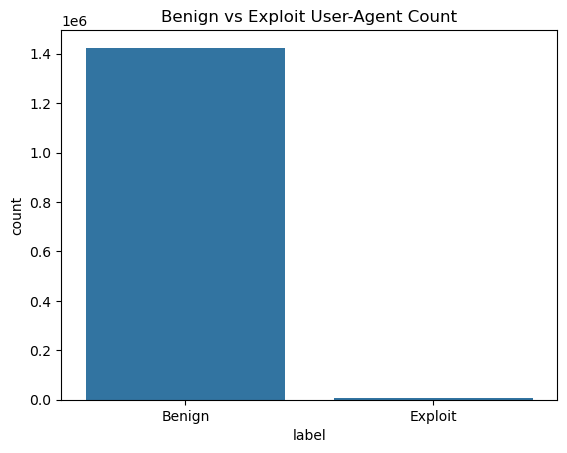

In [15]:
# User-agent distribution
sns.countplot(data=data, x="label")
plt.xticks(ticks=[0, 1], labels=["Benign", "Exploit"])
plt.title("Benign vs Exploit User-Agent Count")
plt.show()

In [17]:
def extract_browser(user_agent):
    if "Chrome" in user_agent:
        return "Chrome"
    elif "Firefox" in user_agent:
        return "Firefox"
    elif "MSIE" in user_agent or "Trident" in user_agent:
        return "Internet Explorer"
    elif "Safari" in user_agent and "Chrome" not in user_agent:
        return "Safari"
    elif "Edge" in user_agent:
        return "Edge"
    elif "Opera" in user_agent:
        return "Opera"
    else:
        return "Other"

In [19]:
# Apply browser extraction
data["browser"] = data["user_agent"].apply(extract_browser)

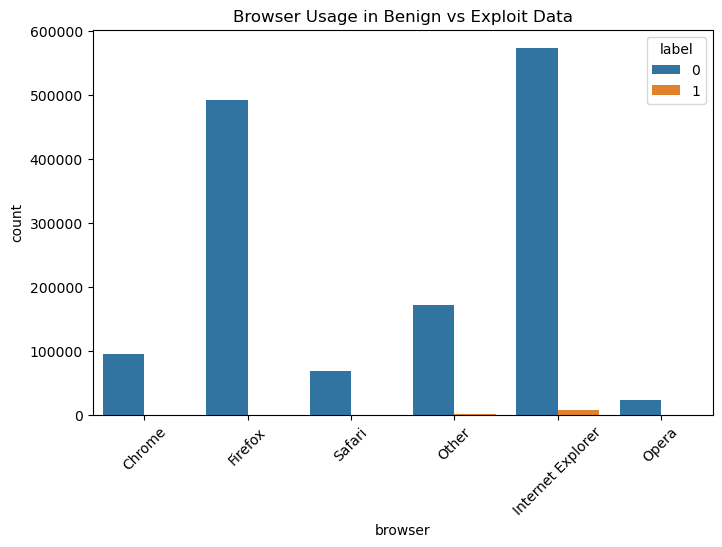

In [21]:
# Plot top browsers
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="browser", hue="label")
plt.xticks(rotation=45)
plt.title("Browser Usage in Benign vs Exploit Data")
plt.show()


Top 10 Most Common User-Agents:
-... -> 74957 times
Mozilla/5.0 (Windows NT 6.1; rv:5.0) Gecko/20100101 Firefox/5.0... -> 65234 times
Mozilla/5.0 (Windows NT 5.1; rv:5.0.1) Gecko/20100101 Firefox/5.0.1... -> 61364 times
Mozilla/5.0 (Windows NT 5.1; rv:5.0) Gecko/20100101 Firefox/5.0... -> 54245 times
Shockwave Flash... -> 48811 times
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0)... -> 46531 times
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:5.0) Gecko/20100101 Firefox/5.0... -> 25881 times
Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR ... -> 24981 times
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:2.0.1) Gecko/20100101 Firefox/4.0.1... -> 22557 times
Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/20100101 Firefox/4.0.1... -> 19667 times


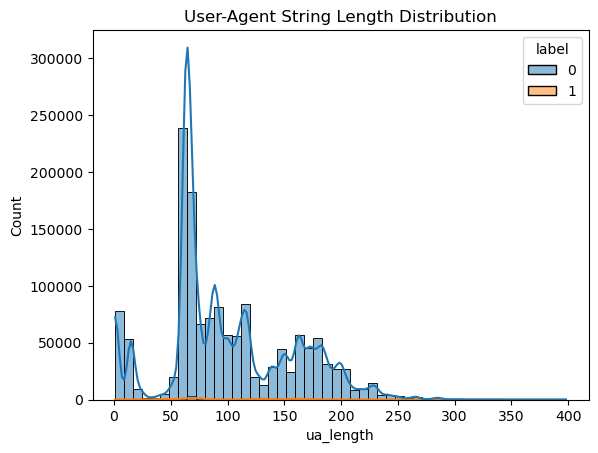

In [23]:
common_agents = Counter(data['user_agent']).most_common(10)
print("\nTop 10 Most Common User-Agents:")
for agent, count in common_agents:
    print(f"{agent[:100]}... -> {count} times")

# Length of user-agents
data["ua_length"] = data["user_agent"].apply(lambda x: len(x))

# Plot distribution of user-agent string lengths
sns.histplot(data, x="ua_length", hue="label", kde=True, bins=50)
plt.title("User-Agent String Length Distribution")
plt.show()